## ECE657A Assignment 1 Q1

**Collaborators:**

- Yanhao Lin 20481552
- Mingrui Zhang 20985422

## 1. Assessment of Data and Applying Normalization

In [70]:
# Download abalone datasets

!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data -O abalone.csv

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 0. pre-process raw data
# load data
features = ['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']

label = ['Rings']
df = pd.read_csv('./abalone.csv', names=features + label)

### 1.1 Is there any missing data?

In [72]:
# Q1.1 check missing values
# The isna() function is used to detect missing values.
# Return a boolean same-sized object indicating if the values are NA.
misses = df.isna().sum().sum()
if misses == 0:
    print('No missing values.', end='\n\n')
else:
    print('Missing ' + misses + ' values.', end='\n\n')

No missing values.



### 1.2 Compute the moments or summarization statistics on the data features (mean, median, variance, skew, kurtosis). Do these highlight anything interesting about the different features?

In [73]:
# Q1.2 Data moments
print('mean:')
print(df.iloc[:, :-1].mean(numeric_only=True), end='\n\n')
print('median:')
print(df.iloc[:, :-1].median(numeric_only=True), end='\n\n')
print('variance:')
print(df.iloc[:, :-1].var(numeric_only=True), end='\n\n')
print('skew:')
print(df.iloc[:, :-1].skew(numeric_only=True), end='\n\n')
print('kurtosis:')
print(df.iloc[:, :-1].kurt(numeric_only=True), end='\n\n')

mean:
Length      0.523992
Diameter    0.407881
Height      0.139516
Whole       0.828742
Shucked     0.359367
Viscera     0.180594
Shell       0.238831
dtype: float64

median:
Length      0.5450
Diameter    0.4250
Height      0.1400
Whole       0.7995
Shucked     0.3360
Viscera     0.1710
Shell       0.2340
dtype: float64

variance:
Length      0.014422
Diameter    0.009849
Height      0.001750
Whole       0.240481
Shucked     0.049268
Viscera     0.012015
Shell       0.019377
dtype: float64

skew:
Length     -0.639873
Diameter   -0.609198
Height      3.128817
Whole       0.530959
Shucked     0.719098
Viscera     0.591852
Shell       0.620927
dtype: float64

kurtosis:
Length       0.064621
Diameter    -0.045476
Height      76.025509
Whole       -0.023644
Shucked      0.595124
Viscera      0.084012
Shell        0.531926
dtype: float64



From the variance data, we can see that the whole weight of abalones is more fluctuated, but their length, diameter, and height do not deviate a lot. This could mean that the weight of the abalones is not affected too much by their size. From the skew data, we can see that the abalone's height is largely right skewed which could indicate that many abalones with heights are much larger than the average height. Combining this data with kurtosis of height, we can see that we have many unusually heavy abalones in this dataset.

### 1.3 Use a pairsplot (the seaborn library has a nice one, for example) to look at the whole of the datset. Choose a subset, just some features, and show it in your report to highlight some features that seem important.

<Figure size 432x288 with 0 Axes>

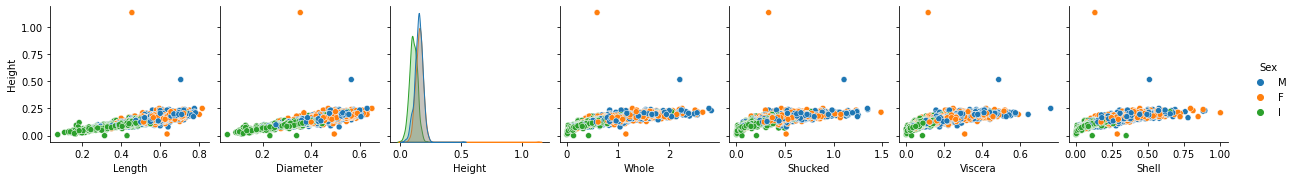

In [74]:
# Q1.3 Pairplot over the features
# Plot all features (sex = hue) over height
plt.figure()
sns.pairplot(data=df[features], y_vars=['Height'], hue='Sex')
plt.show()

From the pairsplot above, we can see that, once the abalones become mature (not infant), the height of the abalones does not affect much for other features.

<Figure size 432x288 with 0 Axes>

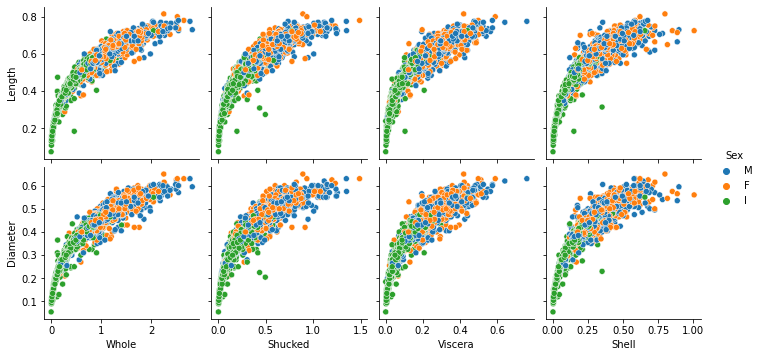

In [75]:
plt.figure()
sns.pairplot(data=df[features], x_vars = ['Whole', 'Shucked', 'Viscera', 'Shell'], y_vars=['Length', 'Diameter'], hue='Sex')
plt.show()

From the pairsplot above, we can see that both length and diameter could affect various kinds of the weight of the abalones. But when they reach a certain threshold, they have less impact on the weight.

### 1.4 Is this a balanced dataset? If not, what kind of correction could we apply?

In [76]:
print(df[label].value_counts())
print("-----------------------")
print('Number of records for each Ring class is not uniform, so the dataset is NOT balanced.')

Rings
9        689
10       634
8        568
11       487
7        391
12       267
6        259
13       203
14       126
5        115
15       103
16        67
17        58
4         57
18        42
19        32
20        26
3         15
21        14
23         9
22         6
27         2
24         2
26         1
1          1
25         1
2          1
29         1
dtype: int64
-----------------------
Number of records for each Ring class is not uniform, so the dataset is NOT balanced.


We can remove samples that are way out of range, smoothing the data to get rid of fluctuations. We can also use normalization techniques, logic check to correct inconsistency, and prediction methods or fitting

### 1.5 Normalize the data using z-score normalization as a preprocessing step

In [77]:
# Q1.5 Normalize data using z-score
# Sex is converted into dummies as it is not quantitative
# Rings is not normalized as it is the label
sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')
features = sex_dummies.columns.tolist() + features[1:]
df = sex_dummies.join(df).drop('Sex', axis=1)
StandardScaler(copy=False).fit_transform(df.values[:, :-1])

print(df.head())

   Sex_F  Sex_I  Sex_M  Length  Diameter  Height   Whole  Shucked  Viscera  \
0      0      0      1   0.455     0.365   0.095  0.5140   0.2245   0.1010   
1      0      0      1   0.350     0.265   0.090  0.2255   0.0995   0.0485   
2      1      0      0   0.530     0.420   0.135  0.6770   0.2565   0.1415   
3      0      0      1   0.440     0.365   0.125  0.5160   0.2155   0.1140   
4      0      1      0   0.330     0.255   0.080  0.2050   0.0895   0.0395   

   Shell  Rings  
0  0.150     15  
1  0.070      7  
2  0.210      9  
3  0.155     10  
4  0.055      7  
